In [1]:
import matplotlib.pyplot as plt
import straph as sg

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

# Stream Graph Theory Properties

Most of the concepts described in the [stream graph formalism](https://arxiv.org/abs/1710.04073) are implemented in ``Straph``. However some concepts also refer to graph theory to avoid any confusion in this section we focus on specific stream graph theory properties.

In [3]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                         path_links=path_directory + "example_links.sg")

## Number of Nodes and Links

The *number of nodes* is defined by $\Large \frac{|W|}{|T|}$.

In [4]:
nb_nodes = S.nb_nodes()
nb_nodes

4.4

If one wants the number of elements in $V$:

In [5]:
len(S.nodes)

6

The *number of links* is defined by $\Large \frac{|E|}{|T|}$

In [6]:
nb_links = S.nb_links()
nb_links

2.0

If one want the number of distincts links in $E$ (number of elements in $E_{V\times V}$).

In [7]:
len(S.links)

8

## Nodes and Links duration

The *node duration* is defined by $\Large \frac{|W|}{|V|}$.

In [8]:
node_duration = S.node_duration()
node_duration

7.333333333333333

The *link duration* is defined by $\Large \frac{|E|}{|V \times V|}$.

In [9]:
link_duration = S.link_duration()
link_duration

1.3333333333333333

## Uniformity and Coverage

The *uniformity* is defined by 
$$ \frac{\sum_{uv\in V \times V}|T_u \cap T_v|}{\sum_{uv\in V \times V}|T_u \cup T_v|}$$

In [10]:
unif = S.uniformity()
unif

0.23795180722891565

The *coverage* is defined by $\Large \frac{|W|}{|T \times V|}$.

In [11]:
cov = S.coverage()
cov

0.7333333333333333

## Nodes and Links weights

Node and link weights capture information on nodes and links density over time:

Node weight at instant 3 : 0.8333333333333334
Link weight at instant 3 : 0.26666666666666666


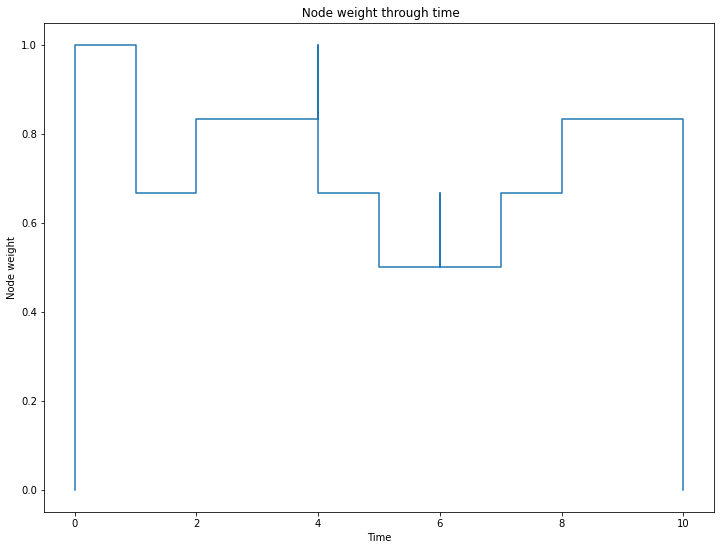

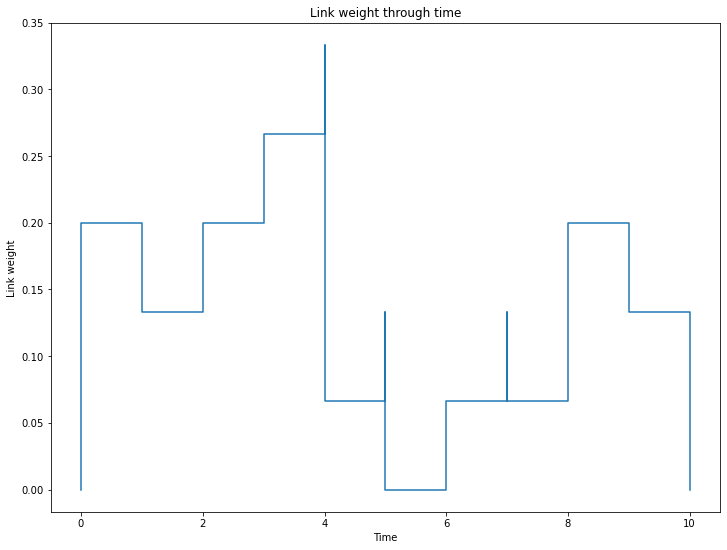

In [12]:
print("Node weight at instant 3 :", S.node_weight_at_t(3))
print("Link weight at instant 3 :", S.link_weight_at_t(3))
_ = S.plot_node_weight()
_ = S.plot_link_weight()

## Node and Link Densities

A node *density* is defined by $$\delta(v) = \frac{\sum_{u\in V, u\neq v}|T_{uv}|}{\sum_{u\in V, u \neq v}|T_u \cap T_v|} $$

In [13]:
node_density = S.node_densities()
node_density

Counter({0: 0.16666666666666666,
         1: 0.17647058823529413,
         2: 0.2,
         3: 0.2857142857142857,
         4: 0.35294117647058826,
         5: 0.3103448275862069})

A link *density* is defined by $$\delta(uv) = \frac{|T_{uv}|}{|T_u \cap T_v|}$$

In [14]:
link_density = S.link_densities()
link_density

Counter({(0, 1): 0.625,
         (1, 2): 0.3333333333333333,
         (1, 4): 0.0,
         (2, 3): 1.0,
         (2, 4): 0.0,
         (3, 4): 0.8,
         (3, 5): 0.2,
         (4, 5): 1.0})

## Degrees and Expected Degrees

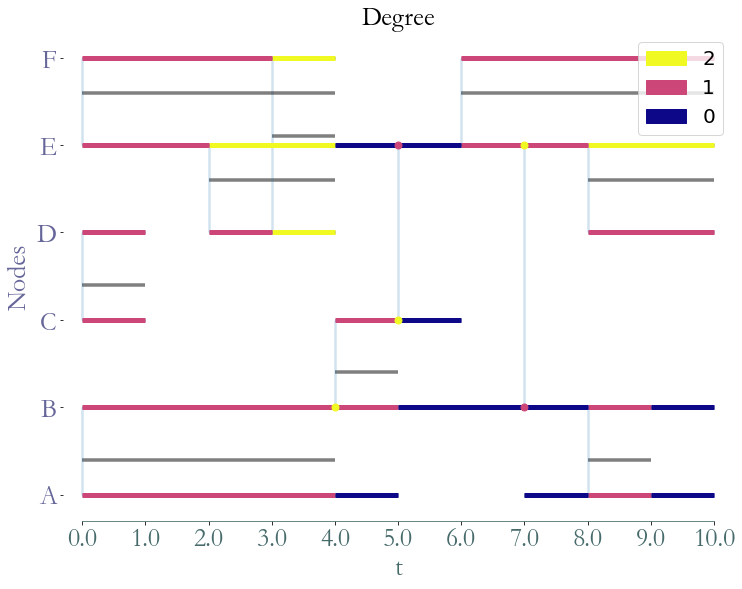

In [15]:
degrees = S.graph_property(sg.nx_degree)
_ = S.plot(degrees,title="Degree")

In [16]:
nodes_degree = S.degrees()
nodes_degree

Counter({0: 0.5, 1: 0.6, 2: 0.2, 4: 1.2000000000000002, 3: 0.6, 5: 0.9})

In [17]:
nodes_expected_degree = S.expected_node_degrees()
nodes_expected_degree

Counter({0: 0.625,
         1: 0.6,
         2: 0.6666666666666666,
         3: 1.2,
         4: 1.2000000000000002,
         5: 1.125})

In [18]:
d_bar = S.average_degree()
print("Average degree of S :\t", d_bar)
print("Degree of S :\t \t", S.stream_graph_degree())
print("Expected degree of S :\t", S.expected_stream_graph_degree())

Average degree of S :	 0.7454545454545456
Degree of S :	 	 0.3333333333333333
Expected degree of S :	 0.9090909090909091


## Neighbors and Neighborhood

The *neighborhood* is defined by  TODO

In [19]:
Ngh = S.neighborhood()
Ngh

{0: {1: [0.0, 4.0, 8.0, 9.0]},
 1: {0: [0.0, 4.0, 8.0, 9.0], 2: [4.0, 5.0], 4: [7.0, 7.0]},
 2: {1: [4.0, 5.0], 3: [0.0, 1.0], 4: [5.0, 5.0]},
 3: {2: [0.0, 1.0], 4: [2.0, 4.0, 8.0, 10.0], 5: [3.0, 4.0]},
 4: {1: [7.0, 7.0],
  2: [5.0, 5.0],
  3: [2.0, 4.0, 8.0, 10.0],
  5: [0.0, 4.0, 6.0, 10.0]},
 5: {3: [3.0, 4.0], 4: [0.0, 4.0, 6.0, 10.0]}}

In [20]:
nb_neighbors = S.nb_neighbors()
nb_neighbors

Counter({0: 1, 1: 3, 2: 3, 4: 4, 3: 3, 5: 2})

## Clustering Coefficient

In [21]:
cc = S.clustering_coefficient()
print("Clustering coefficient :", cc)
cc_bar = S.average_clustering(cc=cc)
print("Average clustering : \t", cc_bar)

Clustering coefficient : Counter({3: 1.0, 5: 1.0, 4: 0.25, 0: 0, 1: 0, 2: 0})
Average clustering : 	 0.3522727272727273
